# Autoencoders

In [12]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Shallow Autoencoder

In [2]:
# this is our input placeholder
input_img = Input(shape=(784,))
n_feature=50
encoded = Dense(n_feature, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [3]:
# We import the training data (MNIST)
(x_train, _), (x_test, _) = mnist.load_data()
# We normalize the data between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# We reshape the images 28X28 to vectors of 784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [4]:
# We train the model
autoencoder.fit(x_train, x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s - loss: 0.3622 - val_loss: 0.2701
Epoch 2/50
60000/60000 [==============================] - 3s - loss: 0.2610 - val_loss: 0.2485
Epoch 3/50
60000/60000 [==============================] - 3s - loss: 0.2375 - val_loss: 0.2244
Epoch 4/50
60000/60000 [==============================] - 3s - loss: 0.2165 - val_loss: 0.2067
Epoch 5/50
60000/60000 [==============================] - 3s - loss: 0.2016 - val_loss: 0.1942
Epoch 6/50
60000/60000 [==============================] - 3s - loss: 0.1908 - val_loss: 0.1847
Epoch 7/50
60000/60000 [==============================] - 3s - loss: 0.1823 - val_loss: 0.1771
Epoch 8/50
60000/60000 [==============================] - 3s - loss: 0.1753 - val_loss: 0.1707
Epoch 9/50
60000/60000 [==============================] - 3s - loss: 0.1692 - val_loss: 0.1651
Epoch 10/50
60000/60000 [==============================] - 4s - loss: 0.1639 - val_loss: 0.1600

In [6]:
decoded_imgs = autoencoder.predict(x_test)

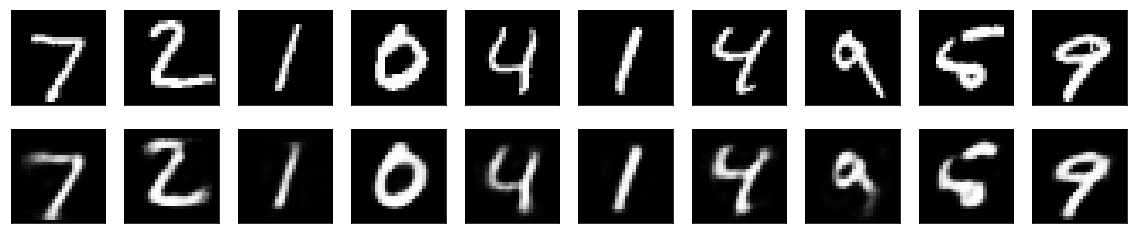

In [8]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2. Shallow Autoencoder for dimensionality reduction

In [16]:
# this is our input placeholder
input_img = Input(shape=(784,))
n_feature=2
encoded = Dense(n_feature, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
# We import the training data (MNIST)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# We normalize the data between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# We reshape the images 28X28 to vectors of 784
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# We train the model
autoencoder.fit(x_train, x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s - loss: 0.4057 - val_loss: 0.2778
Epoch 2/50
60000/60000 [==============================] - 2s - loss: 0.2748 - val_loss: 0.2715
Epoch 3/50
60000/60000 [==============================] - 3s - loss: 0.2702 - val_loss: 0.2675
Epoch 4/50
60000/60000 [==============================] - 3s - loss: 0.2656 - val_loss: 0.2618
Epoch 5/50
60000/60000 [==============================] - 4s - loss: 0.2594 - val_loss: 0.2555
Epoch 6/50
60000/60000 [==============================] - 4s - loss: 0.2548 - val_loss: 0.2525
Epoch 7/50
60000/60000 [==============================] - 3s - loss: 0.2528 - val_loss: 0.2512
Epoch 8/50
60000/60000 [==============================] - 3s - loss: 0.2518 - val_loss: 0.2504
Epoch 9/50
60000/60000 [==============================] - 3s - loss: 0.2512 - val_loss: 0.2497
Epoch 10/50
60000/60000 [==============================] - 3s - loss: 0.2506 - val_loss: 0.2493

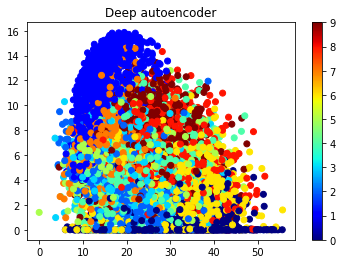

In [19]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)
plt.scatter(encoded_imgs[:,0],encoded_imgs[:,1],c=y_test,cmap='jet')
plt.colorbar()
plt.title('Deep autoencoder');

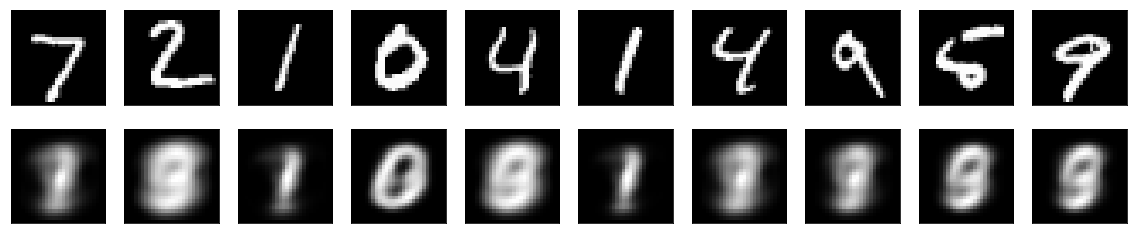

In [20]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28),cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 3. Shallow Autoencoder for denoising

In [42]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


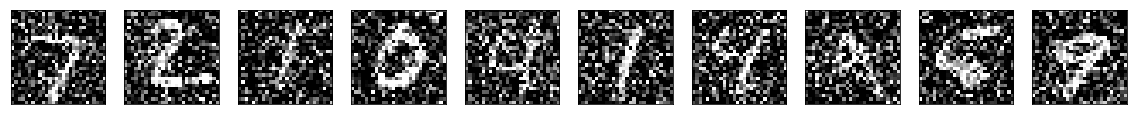

In [43]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [44]:
# Shallow autoencoder
input_img = Input(shape=(784,))
n_feature=50
encoded = Dense(n_feature, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
# We train the model
autoencoder.fit(x_train_noisy, x_train,epochs=50,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s - loss: 0.3349 - val_loss: 0.3062
Epoch 2/50
60000/60000 [==============================] - 4s - loss: 0.2651 - val_loss: 0.2939
Epoch 3/50
60000/60000 [==============================] - 4s - loss: 0.2582 - val_loss: 0.2794
Epoch 4/50
60000/60000 [==============================] - 4s - loss: 0.2457 - val_loss: 0.2636
Epoch 5/50
60000/60000 [==============================] - 4s - loss: 0.2304 - val_loss: 0.2555
Epoch 6/50
60000/60000 [==============================] - 4s - loss: 0.2179 - val_loss: 0.2540
Epoch 7/50
60000/60000 [==============================] - 4s - loss: 0.2081 - val_loss: 0.2551
Epoch 8/50
60000/60000 [==============================] - 4s - loss: 0.2001 - val_loss: 0.2586
Epoch 9/50
60000/60000 [==============================] - 4s - loss: 0.1934 - val_loss: 0.2653
Epoch 10/50
60000/60000 [==============================] - 6s - loss: 0.1879 - val_loss: 0.2732

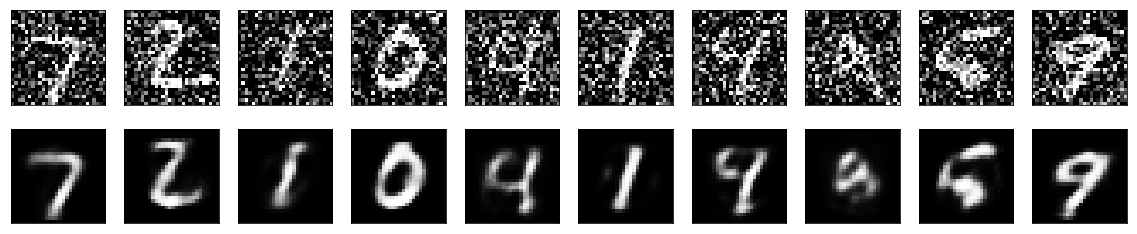

In [45]:
decoded_imgs = autoencoder.predict(x_test_noisy)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28),cmap='gray')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 4. Deep Autoencoder for dimensionality reduction

In [50]:
# this is our input placeholder
input_img = Input(shape=(784,))
encoded = Dense(1000, activation='relu')(input_img)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(250, activation='relu')(encoded)
encoded = Dense(125, activation='relu')(encoded)
encoded = Dense(2, activation='relu')(encoded)


decoded = Dense(125, activation='relu')(encoded)
decoded = Dense(250, activation='relu')(decoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(1000, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)


autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,epochs=50,batch_size=256,\
                shuffle=True,validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
recon_imgs=autoencoder.predict(x_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 25s - loss: 0.3773 - val_loss: 0.2569
Epoch 2/50
60000/60000 [==============================] - 24s - loss: 0.2536 - val_loss: 0.2538
Epoch 3/50
60000/60000 [==============================] - 26s - loss: 0.2517 - val_loss: 0.2523
Epoch 4/50
60000/60000 [==============================] - 28s - loss: 0.2500 - val_loss: 0.2486
Epoch 5/50
60000/60000 [==============================] - 28s - loss: 0.2435 - val_loss: 0.2398
Epoch 6/50
60000/60000 [==============================] - 31s - loss: 0.2377 - val_loss: 0.2355
Epoch 7/50
60000/60000 [==============================] - 29s - loss: 0.2346 - val_loss: 0.2327
Epoch 8/50
60000/60000 [==============================] - 33s - loss: 0.2316 - val_loss: 0.2290
Epoch 9/50
60000/60000 [==============================] - 28s - loss: 0.2284 - val_loss: 0.2253
Epoch 10/50
60000/60000 [==============================] - 29s - loss: 0.2248 - val_lo

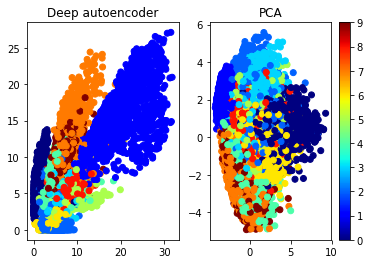

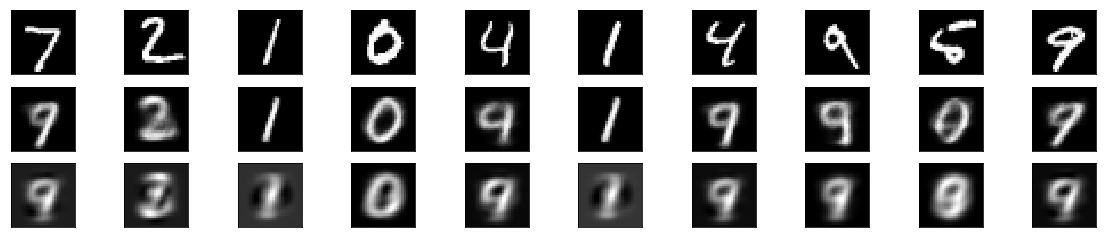

In [51]:
pca = decomposition.PCA(n_components=2)
pca.fit(x_test)
x_red = pca.transform(x_test)
x_pca = pca.inverse_transform(x_red)

plt.figure()
plt.subplot(1,2,1)
plt.scatter(encoded_imgs[:,0],encoded_imgs[:,1],c=y_test,cmap='jet')
plt.title('Deep autoencoder')
plt.subplot(1,2,2)
plt.scatter(x_red[:,0],x_red[:,1],c=y_test,cmap='jet')
plt.title('PCA')
plt.colorbar()

plt.figure()

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(recon_imgs[i,:].reshape(28, 28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_pca[i,:].reshape(28, 28),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)